# Компьютерная лингвистика (лекция 2)

**Предобработка текста: нормализация, леммы и словоформы,
морфологический анализ**

**Компьютерная лингвистика** (КЛ) — междисциплинарная область,
которая возникла следующих наук: лингвистика, математика, информатика (Computer Science), искусственный интеллект (Artificial Intelligence). В своем развитии она до сих пор вбирает и применяет разработанные в этих науках методы и инструменты.

Поскольку в КЛ объектом обработки выступают тексты естественного языка, её развитие невозможно без базовых знаний в области общей лингвистики (языкознания). Лингвистика изучает общие законы естественного языка — его структуру и функционирование, и включает разные области: фонология, морфология, синтаксис, семантика, прагматика, лексикография.

Сегодняшняя тема связана с морфологией. 

**Морфология** — занимается внутренней структурой и внешней формой слов речи, включая части речи и их категории.


Несколько упрощенно задача компьютерной лингвистики может быть сформулирована как разработка методов и средств построения *лингвистических процессоров* для различных прикладных задач по автоматической обработке текстов на ЕЯ. Разработка лингвистического процессора для некоторой прикладной задачи предполагает формальное описание
лингвистических свойств обрабатываемого текста (хотя бы самое простое), которое может рассматриваться как модель текста (или модель языка). 

*Морфологические анализаторы* важной неотъемлемой частью лингвистических процессоров. 

Сложность моделирования в КЛ связана с тем, что ЕЯ — большая
открытая многоуровневая система знаков, возникшая для обмена информацией в процессе практической деятельности человека, и постоянно изменяющаяся в связи с этой деятельностью.
Текст на ЕЯ составлен из отдельных единиц (знаков), и возможно несколько способов разбиения (членения) текста на единицы, относящиеся к разным уровням.

Общепризнано существование следующих уровней:
* уровень предложений (высказываний) — синтаксический уровень;
* уровень слов (словоформ — слов в определенной грамматической форме) — морфологический уровень;
* уровень фонем (отдельных звуков, с помощью которых формируются и различаются слова) — фонологический уровень

В автоматической обработке текста выделают похожие уровни:

* Уровень символов:
** Токенизация: разбиение текста на слова
** Разбиение текста на предложения
* Уровень слов – морфология:
** Разметка частей речи
** Снятие морфологической неоднозначности
* Уровень предложений – синтаксис:
** Выделенние именных или глагольных групп (chunking)
** Выделенние семантических ролей
** Деревья составляющих и зависимостей
* Уровень смысла – семантика и дискурс:
** Разрешение кореферентных связей
** Выделение синонимов
** Анализ аргументативных связей

*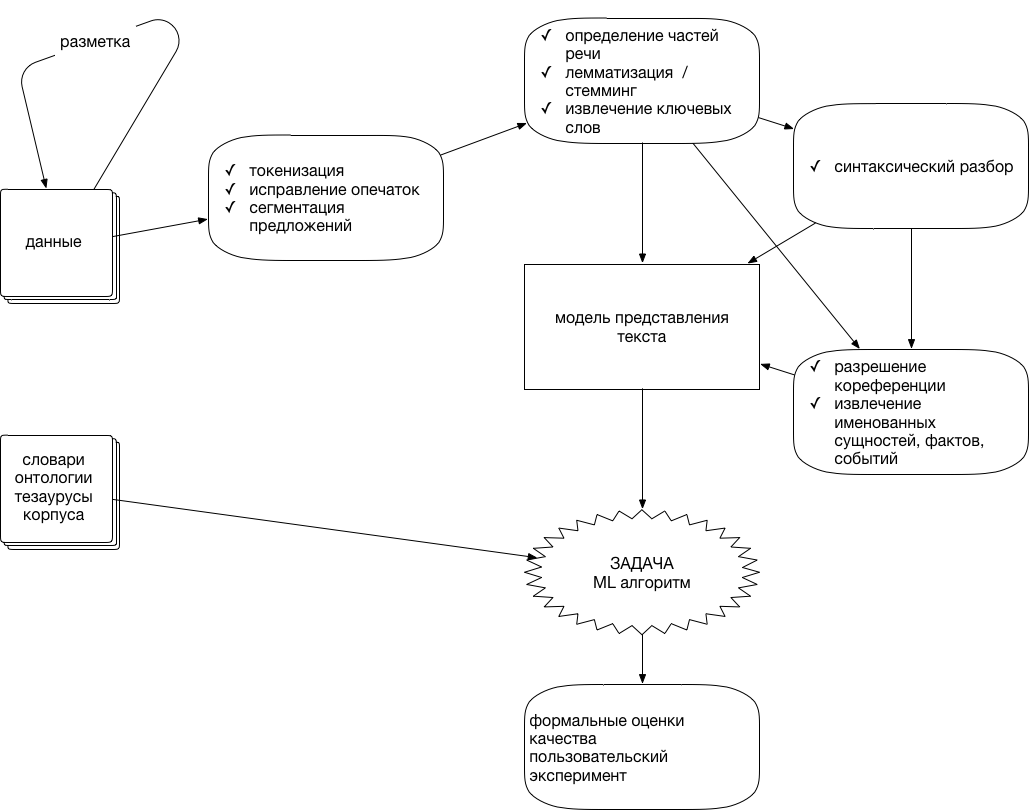

Ссылка на источник картинки: https://github.com/ancatmara/data-science-nlp/

Одной из самых больших сложностей при обработке текстов на ЕЯ
является неоднозначность (многозначность) его единиц, проявляющаяся на всех его уровнях, что выражается в явлениях полисемии, омонимии, синонимии.

* Полисемия — наличие у одной единицы языка нескольких связанных между собой значений, в частности, полисемия слов, например: земля — суша, почва, конкретная планета. 
* Синонимия — полное или частичное совпадение значений разных единиц, например: синонимия слов: негодяй и
подлец, синонимия приставок (морфов) пре- и пере- (прекрасный, пересохший). 
* Омонимия — совпадение по форме двух разных по смыслу единиц
(в отличие от полисемии нет смысловой связи между совпавшими по форме единицами). 

Различают следующие виды омонимии:

* Лексическая омонимия означает одинаково звучащие и пишущиеся слова, не имеющие общих элементов смысла, например, рожа — лицо и вид болезни. *Орган, парить, атлас.*
* Морфологическая омонимия — совпадение форм одного и того же
слова (лексемы), например, словоформа карандаш соответствует именительному и винительному падежам. 
* Лексико-морфологическая омонимия (наиболее частый вид) возникает при совпадении словоформ двух разных лексем, например, стих — два омонима: глагол в единственном числе мужского рода и существительное в единственном числе, именительном падеже. *Хранение денег в банке. Что делают белки в клетке?*
* Синтаксическая омонимия означает неоднозначность синтаксической структуры, что приводит к нескольким интерпретациям: Студенты из Минска поехали в Москву, Flying planes can be dangerous (известный пример Хомского) - «пилотирование самолётов может быть опасным» или «летящие самолёты могут быть опасными». *Мужу изменять нельзя. Его удивил простой солдат. Эти типы стали есть в цехе.*


Также выделяют другие виды *неоднозначности*

* Неологизмы: репостнуть, расшарить, биткойны
* Разные варианты написания: Россия, Российская Федерация, РФ
* Нестандартное написание (в т.ч. орфографические ошибки и опечатки): каг дила? куптиь телфон

# Предобработка текста (схематизация документа)

Первый шаг любой аналитики – получение данных. Предположим, что данные есть в некотором подходящем для работы формате. Следующая задача – предобработка. Выделяют следующие этапы предобработки:

* Токенизация — самый первый шаг при обработке текста.
* Нормализация — приведение к одному регистру, удаляются пунктуации, исправление опечаток и т.д.
** Стемминг — выделение псевдоосновы слова.
** Лемматизация — приведение слов к словарной ("начальной") форме.
* Удаление стоп-слов — слов, которые не несут никакой смысловой нагрузки (предлоги, союзы и т.п.) Список зависит от задачи!
* Part-of-Speech tagging (морфологическая разметка) — приписывание частеречного тега или цепочки грамматических тегов (полный грамматический разбор) токену.

NB! Не всегда нужны все этапы, все зависит от задачи. Некоторые этапы предобработки приводят к потере информации и могут усложнить дальнейшее построение модели.

Также в дополнение к этим шагам можно делать: приведение к нижнему регистру, фильтрацию по частоте/длине/соответствию регулярному выражению.


## Токенизация

Токенизировать - значит, поделить текст на части: слова, ключевые слова, фразы, символы и т.д., иными словами **токены**.



Что в данном тексте является токенами?

```
Продаётся LADA 4x4. ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега. Комплектация полная. 

Новая в салоне 750 000, отдам за 650 000. Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.

* Модификация: 1.6 MT (89 л.с.) 
* Владельцев по ПТС: 4+ 
* VIN или номер кузова: XTA21104*50****47 
* Мультимедиа и навигация: CD/DVD/Blu-ray 
* Шины и диски: 14" 

Краснодар, ул. Миклухо-Маклая, д. 4/5, подъезд 1 

Тел. 8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33 

e-mail: ivanov.ivan-61@mail.ru 

И.И. Иванов (Иван Иванович)

```

In [ ]:
text = '''
Продаётся LADA 4x4. ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега. 
Комплектация полная. Новая в салоне 750 000, отдам за 650 000. 
Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой. 
Краснодар, ул. Миклухо-Маклая, д. 4/5, подьезд 1 
Тел. 8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33 
И.И. Иванов (Иван Иванович) 
'''

tokens = text.split()
tokens

['Продаётся',
 'LADA',
 '4x4.',
 'ПТС',
 '01.12.2018,',
 'куплена',
 '20',
 'января',
 '19',
 'года,',
 '10',
 '000',
 'км',
 'пробега.',
 'Комплектация',
 'полная.',
 'Новая',
 'в',
 'салоне',
 '750',
 '000,',
 'отдам',
 'за',
 '650',
 '000.',
 'Возможен',
 'обмен',
 'на',
 'ВАЗ-2110',
 'или',
 'ВАЗ',
 '2109',
 'с',
 'вашей',
 'доплатой.',
 'Краснодар,',
 'ул.',
 'Миклухо-Маклая,',
 'д.',
 '4/5,',
 'подьезд',
 '1',
 'Тел.',
 '8(999)1234567,',
 '8',
 '903',
 '987-65-43,',
 '+7',
 '(351)',
 '111',
 '22',
 '33',
 'И.И.',
 'Иванов',
 '(Иван',
 'Иванович)']

In [ ]:
len(tokens)

56

Самый наивный способ токенизировать текст - разделить с помощью функции `split()`. Но `split` упускает очень много всего, например, не отделяет пунктуацию от слов. Кроме этого, есть ещё много менее тривиальных проблем, поэтому лучше использовать готовые токенизаторы.

Yargy парсер. Документация: https://github.com/natasha/yargy

In [ ]:
! pip install yargy

     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 61kB 4.9MB/s 
     |████████████████████████████████| 8.2MB 9.1MB/s 


In [ ]:
# максимально разбивает
from yargy.tokenizer import MorphTokenizer

tknzr = MorphTokenizer()
tokens = [_.value for _ in tknzr(text)]
print(tokens)
len(tokens)

['\n', 'Продаётся', 'LADA', '4', 'x', '4', '.', 'ПТС', '01', '.', '12', '.', '2018', ',', 'куплена', '20', 'января', '19', 'года', ',', '10', '000', 'км', 'пробега', '.', '\n', 'Комплектация', 'полная', '.', 'Новая', 'в', 'салоне', '750', '000', ',', 'отдам', 'за', '650', '000', '.', '\n', 'Возможен', 'обмен', 'на', 'ВАЗ', '-', '2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой', '.', '\n', 'Краснодар', ',', 'ул', '.', 'Миклухо', '-', 'Маклая', ',', 'д', '.', '4', '/', '5', ',', 'подьезд', '1', '\n', 'Тел', '.', '8', '(', '999', ')', '1234567', ',', '8', '903', '987', '-', '65', '-', '43', ',', '+', '7', '(', '351', ')', '111', '22', '33', '\n', 'И', '.', 'И', '.', 'Иванов', '(', 'Иван', 'Иванович', ')', '\n']


107

Очень популярна библиотека nltk. Учебник по nltk: https://www.nltk.org/book


Примеры использования: https://github.com/hb20007/hands-on-nltk-tutorial 

In [ ]:
import nltk 
from nltk.tokenize import word_tokenize # готовый токенизатор библиотеки nltk

Чтобы использовать токенизатор ```word_tokenize```, нужно сначала скачать данные для nltk о пунктуации и стоп-словах.

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Применим токенизацию:

In [ ]:
tokens = word_tokenize(text)
print(tokens)
len(tokens)

['Продаётся', 'LADA', '4x4', '.', 'ПТС', '01.12.2018', ',', 'куплена', '20', 'января', '19', 'года', ',', '10', '000', 'км', 'пробега', '.', 'Комплектация', 'полная', '.', 'Новая', 'в', 'салоне', '750', '000', ',', 'отдам', 'за', '650', '000', '.', 'Возможен', 'обмен', 'на', 'ВАЗ-2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой', '.', 'Краснодар', ',', 'ул', '.', 'Миклухо-Маклая', ',', 'д', '.', '4/5', ',', 'подьезд', '1', 'Тел', '.', '8', '(', '999', ')', '1234567', ',', '8', '903', '987-65-43', ',', '+7', '(', '351', ')', '111', '22', '33', 'И.И', '.', 'Иванов', '(', 'Иван', 'Иванович', ')']


81

В nltk вообще есть довольно много токенизаторов:

In [ ]:
from nltk import tokenize
dir(tokenize)[:16]

['BlanklineTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'PunktSentenceTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer',
 'TreebankWordTokenizer',
 'TweetTokenizer',
 'WhitespaceTokenizer',
 'WordPunctTokenizer']

Некоторые - вообще не для текста на естественном языке:

In [ ]:
tokenize.SExprTokenizer().tokenize("(a (b c)) d e (f)")

['(a (b c))', 'd', 'e', '(f)']

**Правильный токенизатор подбирается исходя из языка и  требований задачи**

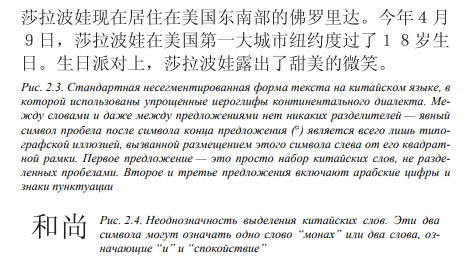

## Сегментация предложений

Сегментацию предложений иногда называют сплиттингом.

Основные признаки — знаки препинания. "?", "!" как правило однозначны, проблемы возникают с "." Возможное решение: бинарный классификатор для сегментации предложений. Для каждой точки "." определить, является ли она концом предложения или нет.

In [ ]:
from nltk.tokenize import sent_tokenize

sents = sent_tokenize(text)
print(len(sents))
sents

10


['\nПродаётся LADA 4x4.',
 'ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега.',
 'Комплектация полная.',
 'Новая в салоне 750 000, отдам за 650 000.',
 'Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.',
 'Краснодар, ул.',
 'Миклухо-Маклая, д.',
 '4/5, подьезд 1 \nТел.',
 '8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33 \nИ.И.',
 'Иванов (Иван Иванович)']

Опять же, это не единственное средство. Можно воспользоваться библиотекой `rusenttokenize`. https://github.com/deepmipt/ru_sentence_tokenizer

In [ ]:
! pip install rusenttokenize

In [ ]:
from rusenttokenize import ru_sent_tokenize
sents = ru_sent_tokenize(text)

print(len(sents))
sents

6


['Продаётся LADA 4x4.',
 'ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега.',
 'Комплектация полная.',
 'Новая в салоне 750 000, отдам за 650 000.',
 'Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.',
 'Краснодар, ул. Миклухо-Маклая, д. 4/5, подьезд 1 \nТел. 8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33 \nИ.И. Иванов (Иван Иванович)']

## Очистка текста


Очистка текста включает в себя несколько этапов: удаление пунктуации, преобразование регистра, исправление опечаток, удаление стоп-слов. 

Сюда же включаются этапы очистки от лишней информации (тегов html-разметки, url, непонятных
символов и др.) и приведения отдельных потенциально важных элементов текстов к единому виду (времени или дат, например). **Об этом в задании 2.**

In [ ]:
# Способ №1

# набор пунктуационных символов зависит от задачи и текста
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
for ch in string.punctuation:
  clean_text = text.replace(ch,"")
print (clean_text.split())

['Продаётся', 'LADA', '4x4.', 'ПТС', '01.12.2018,', 'куплена', '20', 'января', '19', 'года,', '10', '000', 'км', 'пробега.', 'Комплектация', 'полная.', 'Новая', 'в', 'салоне', '750', '000,', 'отдам', 'за', '650', '000.', 'Возможен', 'обмен', 'на', 'ВАЗ-2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой.', 'Краснодар,', 'ул.', 'Миклухо-Маклая,', 'д.', '4/5,', 'подьезд', '1', 'Тел.', '8(999)1234567,', '8', '903', '987-65-43,', '+7', '(351)', '111', '22', '33', 'И.И.', 'Иванов', '(Иван', 'Иванович)']


In [ ]:
# Способ №2
punct = string.punctuation
clean_words = [w.strip(punct) for w in word_tokenize(text)]
print(clean_words)

['Продаётся', 'LADA', '4x4', '', 'ПТС', '01.12.2018', '', 'куплена', '20', 'января', '19', 'года', '', '10', '000', 'км', 'пробега', '', 'Комплектация', 'полная', '', 'Новая', 'в', 'салоне', '750', '000', '', 'отдам', 'за', '650', '000', '', 'Возможен', 'обмен', 'на', 'ВАЗ-2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой', '', 'Краснодар', '', 'ул', '', 'Миклухо-Маклая', '', 'д', '', '4/5', '', 'подьезд', '1', 'Тел', '', '8', '', '999', '', '1234567', '', '8', '903', '987-65-43', '', '7', '', '351', '', '111', '22', '33', 'И.И', '', 'Иванов', '', 'Иван', 'Иванович', '']


In [ ]:
# преобразование регистра
clean_words = [w.lower() for w in clean_words if w != '']
print(clean_words)

['продаётся', 'lada', '4x4', 'птс', '01.12.2018', 'куплена', '20', 'января', '19', 'года', '10', '000', 'км', 'пробега', 'комплектация', 'полная', 'новая', 'в', 'салоне', '750', '000', 'отдам', 'за', '650', '000', 'возможен', 'обмен', 'на', 'ваз-2110', 'или', 'ваз', '2109', 'с', 'вашей', 'доплатой', 'краснодар', 'ул', 'миклухо-маклая', 'д', '4/5', 'подьезд', '1', 'тел', '8', '999', '1234567', '8', '903', '987-65-43', '7', '351', '111', '22', '33', 'и.и', 'иванов', 'иван', 'иванович']


Как правило, спеллчекеры (программы для исправления ошибок/опечаток) основаны на расстоянии Левенштейна (редакционное расстояние, edit distance). Это минимальное количество операций вставки одного символа, удаления одного символа и замены одного символа на другой, необходимых для превращения одной строки в другую. Модификация этого алгоритма — расстояние Дамерау-Левенштейна — включает также операцию перестановки символов. **Об этом в задании 3.**

В рельной жизни можно использовать сторонние программы. Например, Yandex Spellchecker API https://yandex.ru/dev/speller/doc/dg/concepts/api-overview.html

**Стоп-слова** — высокочастотные слова, которые не дают нам никакой информации о конкретном тексте. Они составляют верхушку частотного списка в любом языке. Набор стоп-слов не универсален, он будет зависеть от вашей задачи. Обычно начинают с готовых списков стоп-слов, а потом их дополняют. 

In [ ]:
from nltk.corpus import stopwords
sw = stopwords.words('russian')
print(sw)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
print([w if w not in sw else print(w) for w in clean_words])

в
за
на
или
с
['продаётся', 'lada', '4x4', 'птс', '01.12.2018', 'куплена', '20', 'января', '19', 'года', '10', '000', 'км', 'пробега', 'комплектация', 'полная', 'новая', None, 'салоне', '750', '000', 'отдам', None, '650', '000', 'возможен', 'обмен', None, 'ваз-2110', None, 'ваз', '2109', None, 'вашей', 'доплатой', 'краснодар', 'ул', 'миклухо-маклая', 'д', '4/5', 'подьезд', '1', 'тел', '8', '999', '1234567', '8', '903', '987-65-43', '7', '351', '111', '22', '33', 'и.и', 'иванов', 'иван', 'иванович']


# Морфологический анализ

Одной из основ языка является его словарь. Но что содержит в себе словарь? Так как термин **«слово»** является слишком многозначным для того, чтобы употреблять его в строгом научном тексте, введём несколько понятий.

Если из текста извлечь все подстроки, не содержащие разделителей (пробелов, некоторых знаков препинания и др.), мы получим множество **токенов**. Считается, что для каждого токена существует его начальная (или нормальная) форма (также называемая **леммой**). От этой начальной формы создаются все остальные формы слова путем флексии, то есть некоторых изменений этой начальной формы. 



Образование новых слов или их форм происходит на уровне комбинирования **морфов** — минимальных значащих единиц языка. Морфы делятся на корневые (корень слова) и служебные: префикс (приставка), суффикс, флексия (окончание), постфикс. Носителем основного смысла слова является корень, а служебные, в общем случае, придают дополнительный смысл. Разбиение слова на морфы называется морфемным
разбором.

Например: поехали
* поехал - основа, и - флексия
* по - приставка, ех − корень, суффиксы − ал, окончание − и


Некоторые служебные морфы (например, приставки и суффиксы) отвечает за образование новых слов, другие (например, окончания) — за образование форм слов. Изменение формы слова привязывается к набору грамматических параметров (тегов): часть речи, род, число, падеж, притяжательность и т.п.

Под **словоформой** мы будем понимать группу (кортеж), состоящую из токена, связанной с ним начальной формы и множества параметров. Например, словоформой является множество ⟨кошачьего, кошачий, {прил, муж. род, ед. ч., род. п}⟩, которое содержит в себе строку «кошачьего», связанную с начальной формой «кошачий», и которая характеризуется следующими параметрами: прилагательное в мужском роде,
единственном числе и родительном падеже. Под **лексемой** мы будем понимать множество всех словоформ, связанных с данной начальной формой.

Под словоупотреблением мы будем понимать вхождение словоформы в текст. Например, фраза «Косой косой косил косой косой за песчаной косой» содержит в себе 8 словоупотреблений, 7 словоформ, 6 лексем и 4 уникальных токена. Это становится очевидным, если вместо строк записать словоформы.
```
<косой, косой, {прил, муж. род, ед. ч., им. п.}>
<косой, косой, {сущ, муж. род, ед. ч., им. п.}>
<косил, косить, {гл, 3 лицо, ед. ч., прош. вр., муж. род}>
<косой, косой, {прил, жен. род, ед. ч., тв. п.}>
<косой, коса, {сущ, жен. род, ед. ч., тв. п.}>
<за, за, {предл}>
<песчаной, песчаный, {прил, жен. род, ед. ч., тв. п.}>
<косой, коса, {сущ, жен. род, ед. ч., тв. п.}>
```

Исходя из данных определений, можно сказать, что задачей морфологического анализа является нахождение в словаре словоформы по ее токену. Задача морфологического синтеза прямо противоположная: по словоформе необходимо вернуть ее токен.

**Морфологический анализ** — это получение леммы или основы (псевдоосновы) заданного токена, а при необходимости, морфологических параметров.

Морфологический анализ — не самая сильная сторона `NLTK`. Для этих задач лучше использовать `pymorphy2` или `pymystem3` для русского языка и, например, `Spacy` для европейских.

**Возможности библиотеки pymorphy2 будут рассмотрены на следующем практическом занятии.**

## Лемматизация и стемминг



Почему это хорошо с точки зрения предобработки данных? Для многих задач естественно рассматривать как отдельный признак каждое *слово*, а не каждую его отдельную форму. 

**Стемминг** (англ. stemming — находить происхождение) — это процесс нахождения основы слова для заданного исходного слова. Основа слова не обязательно совпадает с морфологическим корнем слова. 

**Лемматизация** – это сведение разных форм одного слова к начальной форме – **лемме**. 

*Сравнение стемминга и лемматизации*

Стемминг (stemming) – приближенный эвристический процесс, в ходе которого от слов отбрасываются окончания в расчете на то, что в большинстве случаев это себя оправдает. Часто происходит удаление производных аффиксов.

Лемматизация (lemmatization) – точный процесс с использованием лексикона и морфологического анализа слов, в результате которого удаляются только флективные
окончания и возвращается основная или словарная, форма слова, называемая леммой.

Пример:
Лексема saw после стемминга может стать буквой s, а в ходе лемматизации либо словом see, либо saw, в зависимости от того, глагол это или существительное.

Лексема (token) – это экземпляр последовательности символов в определенном документе, объединенных в семантическую единицу для обработки

Нетипичные случаи разбиения:

`Mr. O’Neill thinks that the boys’ stories about Chile’s capital aren’t amusing`

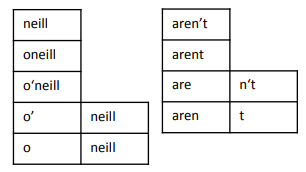

Распознавания лексем как терминов:
1. Языки программирования (C+, C#)
2. Названия самолетов (B-52)
3. Телешоу (M*A*S*H)
4. Адреса электронной почты (abc@gmail.com)
5. IP-адреса (142.12.23.456)
6. URL (http://stuff.big.com/new/serd.html)

Дефисы:
1. Разделение гласных (co-education)
2. Объединение существительных (Hewlett-Parker)
3. Группирование слов (the-hold-him-back-and-him-away maneuver)

Другие примеры:
1. San Francisco-Los Angeles
2. 11.12.49 | 11 December 1949

**Нормализация токенов** (token normalization) – это процесс приведения токенов к канонической форме, чтобы устранить несущественные различия между последовательностями символов.

В процессе нормализации, как правило, создаются классы
эквивалентности, которые обычно называются по имени
одного из их членов.
Пример: anti-discriminatory и antidiscriminatory

Альтернативный метод основан на поддержании связей
между ненормализованными лексемами. Например,
расширение запроса с помощью словаря синонимов
(можно делать с помощью [wordnet](https://wordnet.princeton.edu/)). Пример: car и automobile

Разные сложные случаи:

*Ударения и диакритические символы*

Так как редко встречаются, то можно считать naïve и naive одинаковыми словами. В некоторых языках это критично, например, peña означает утёс, а pena – горе. Но важно и как это слово будут писать в запросе пользователи.

*Использование заглавных букв – игнорирование регистра*

В большинстве случаев – это удачное решение: Automobile и automobile.  Проблематичнее с именами собственными: Black, the Fed, General Motors

*Специфика английского языка:*

Американизмы: colour / color

Даты: 3.12.90 – в США означает март, в Европе – декабрь

*Сравнение стемминга и лемматизации*

Стемминг (stemming) – приближенный эвристический процесс, в ходе которого от слов отбрасываются окончания в расчете на то, что в большинстве случаев это себя оправдает. Часто происходит удаление производных аффиксов.

Лемматизация (lemmatization) – точный процесс с использованием лексикона и морфологического анализа слов, в результате которого удаляются только флективные
окончания и возвращается основная или словарная, форма слова, называемая леммой.

Пример:
Лексема saw после стемминга может стать буквой s, а в ходе лемматизации либо словом see, либо saw, в зависимости от того, глагол это или существительное.

Стемминг — отсечение от слова окончаний и суффиксов, чтобы оставшаяся часть, называемая stem, была одинаковой для всех грамматических форм слова. Стем необязательно совпадает с морфлогической основой слова. Одинаковый стем может получиться и не у однокоренных слов и наоборот — в этом проблема стемминга.

1-ый вид ошибки: белый, белка, белье $\implies$ бел

2-ой вид ошибки: трудность, трудный $\implies$ трудност, труд

3-ий вид ошибки: быстрый, быстрее $\implies$ быст, побыстрее $\implies$ побыст

Самый простой алгоритм, [алгоритм Портера](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B5%D0%BC%D0%BC%D0%B5%D1%80_%D0%9F%D0%BE%D1%80%D1%82%D0%B5%D1%80%D0%B0), состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.

**Snowball stemmer** - улучшенный вариант стеммера Портера; в отличие от него умеет работать не только с английским текстом.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [ ]:
poem = '''
По морям, играя, носится
с миноносцем миноносица.
Льнет, как будто к меду осочка,
к миноносцу миноносочка.
И конца б не довелось ему,
благодушью миноносьему.
Вдруг прожектор, вздев на нос очки,
впился в спину миноносочки.
Как взревет медноголосина:
Р-р-р-астакая миноносина!
'''

words = [w.strip(punct).lower() for w in word_tokenize(poem)]
words = [w for w in words if w not in sw and w != '']

In [ ]:
snowball = SnowballStemmer("russian")

for w in words:
    print("%s: %s" % (w, snowball.stem(w)))

морям: мор
играя: игр
носится: нос
миноносцем: миноносц
миноносица: миноносиц
льнет: льнет
меду: мед
осочка: осочк
миноносцу: миноносц
миноносочка: миноносочк
конца: конц
б: б
довелось: довел
благодушью: благодуш
миноносьему: минонос
прожектор: прожектор
вздев: вздев
нос: нос
очки: очк
впился: впил
спину: спин
миноносочки: миноносочк
взревет: взревет
медноголосина: медноголосин
р-р-р-астакая: р-р-р-астак
миноносина: миноносин


Лемматизация — процесс приведения словоформы к лемме, т.е. нормальной (словарной) форме. Это более сложная задача, чем стемминг, но и результаты дает гораздо более осмысленные, особенно для языков с богатой морфологией.

* кошке, кошку, кошкам, кошкой $\implies$ кошка
* бежал, бежит, бегу $\implies$ бежать
* белому, белым, белыми $\implies$ белый

Для корректной лемматизации необходимо реализовать частеречную разметку: POS-тэггинг.

**Частеречная разметка**, или **POS-tagging** (part of speech tagging) — определение части речи и грамматических характеристик слов в тексте (корпусе) с приписыванием им соответствующих тегов.

Для большинства слов возможно несколько разборов (т.е. несколько разных лемм, несколько разных частей речи и т.п.). Теггер генерирует все варианты, ранжирует их по вероятности и по умолчанию выдает наиболее вероятный. Выбор одного разбора из нескольких называется снятием омонимии, или дизамбигуацией.

Справочник частей речи: https://universaldependencies.org/u/pos/

Например, NOUN: noun (существительное), VERB: verb (глагол), ADJ: adjective (прилагательное)

**pymystem3** — это питоновская обертка для яндексовского морфологичекого анализатора Mystem. Документация: https://yandex.ru/dev/mystem/doc/index.html

[Pymorphy 2](http://pymorphy2.readthedocs.io/en/latest/) — полноценный морфологический анализатор, целиком написанный на Python.

In [ ]:
!pip install pymystem3

In [ ]:
!pip install pymorphy2

В pymorphy2 для морфологического анализа слов есть ```MorphAnalyzer()```:

In [ ]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

pymorphy2 работает с отдельными словами. Если дать ему на вход предложение - он его просто не лемматизирует, т.к. не понимает:

In [ ]:
sentence = '''Неотменимая модальность зримого. 
Хотя бы это, если не больше, говорят моей мысли мои глаза. 
Я здесь, чтобы прочесть отметы сути вещей
'''
sent = word_tokenize(sentence)

Лемматизируем слово "зримого" из предложения ```sentence``` с помощью метода ```parse()```:

In [ ]:
ana = pymorphy2_analyzer.parse(sent[2])
ana

[Parse(word='зримого', tag=OpencorporaTag('ADJF,Qual neut,sing,gent'), normal_form='зримый', score=0.5, methods_stack=((DictionaryAnalyzer(), 'зримого', 4, 15),)),
 Parse(word='зримого', tag=OpencorporaTag('ADJF,Qual masc,sing,gent'), normal_form='зримый', score=0.25, methods_stack=((DictionaryAnalyzer(), 'зримого', 4, 1),)),
 Parse(word='зримого', tag=OpencorporaTag('ADJF,Qual anim,masc,sing,accs'), normal_form='зримый', score=0.25, methods_stack=((DictionaryAnalyzer(), 'зримого', 4, 3),))]

Выведем его нормальную форму:

In [ ]:
ana[0].normal_form

'зримый'

In [ ]:
print('Слово:', ana[0].word)
print('Тэг:', ana[0].tag)
print('Лемма:', ana[0].normal_form)
print('Вероятность:', ana[0].score)

Слово: зримого
Тэг: ADJF,Qual neut,sing,gent
Лемма: зримый
Вероятность: 0.5


ADJF - имя прилагательное (полное)

В pymorphy2 для русского языка используются словари OpenCorpora и граммемы, принятые в OpenCorpora (с небольшими изменениями). https://pymorphy2.readthedocs.io/en/latest/user/grammemes.html

Нормализация предложения "вижу три села" может дать "видеть тереть сесть"

In [ ]:
sent2 = word_tokenize('вижу три села')

In [ ]:
sent2

['вижу', 'три', 'села']

In [ ]:
lemmatized_output = ' '.join([pymorphy2_analyzer.parse(w)[0].normal_form for w in sent2])
lemmatized_output

'видеть три село'

In [ ]:
for w in words:
    print("%s: %s :%s" % (w, snowball.stem(w), pymorphy2_analyzer.parse(w)[0].normal_form))

морям: мор :море
играя: игр :играть
носится: нос :носиться
миноносцем: миноносц :миноносец
миноносица: миноносиц :миноносица
льнет: льнет :льнуть
меду: мед :мёд
осочка: осочк :осочок
миноносцу: миноносц :миноносец
миноносочка: миноносочк :миноносочек
конца: конц :конец
б: б :б
довелось: довел :довестись
благодушью: благодуш :благодушие
миноносьему: минонос :миноносий
прожектор: прожектор :прожектор
вздев: вздев :вздеть
нос: нос :нос
очки: очк :очки
впился: впил :впиться
спину: спин :спина
миноносочки: миноносочк :миноносочек
взревет: взревет :взреветь
медноголосина: медноголосин :медноголосина
р-р-р-астакая: р-р-р-астак :р-р-р-астакать
миноносина: миноносин :миноносина


pymorchy2 работает на основе словая OpenCorpora, в котором более 250 тысяч слова. Но, как показывает практика и этот простой пример, составить абсолютно полный словарь практически невозможно, ведь естественный язык является
постоянно развивающейся системой. Это связано с появлением текстов и лексики из новых предметных областей; всё новыми ошибками, появляющимися в текстах; новыми именами собственными, которые авторы придумывают для беллетристики, или которые приходят с новостями из заграницы; новыми словами и словоформами, которые создаётся в художественных текстах. 

В связи с наличием подобных явлений в языке в систему морфологического анализа необходимо вводить модуль анализа несловарных слов. Обычно он реализуется с помощью набора эвристик, таких как отсечение префиксов, аналогия по окончанию и правила для слов с дефисом.

Ещё одной важной функцией является снятие морфологической омонимии. В разных системах реализуются два различных подхода для решения этой задачи: контекстное и бесконтекстное снятие. Бесконтекстное снятие выполняется на основе подсчёта статистики по размеченному корпусу, а контекстное снятие — с помощью классификатора, настроенного
при помощи одного из методов машинного обучения.

Логическая структура словаря представляется в виде нескольких таблиц: лемм, флексий, приставок, морфологических характеристик. Таблица лемм содержит список псевдооснов слов со ссылками на таблицы флексий и приставок. В таблице флексий каждому из окончаний слов соответствует ссылка на соответствующие морфологические характеристики. Морфологический разбор слова по словарю состоит в поиске максимально совпадающей псевдоосновы в таблице лемм, поиск соответствующих приставки и окончания, а затем нахождение по таблице окончаний соответствующих морфологических характеристик.

Для анализа неизвестных слов в Pymorphy2 используются несколько методов, которые применяются последовательно. Изначально от слова отсекается префикс из набора известных префиксов и если остаток слова был найден в словаре, то отсеченный префикс приписывается к результатам разбора. Если этот метод не сработал, то аналогичные действия выполняются для префикса слова длиной от 1 до 5, даже если такой префикс является неизвестным. Затем, в случае неудачи, словоформа разбирается по окончанию. Для этого используется дополнительный автомат всех окончаний, встречающихся в словаре с имеющимися разборами. В процессе построения удаляются редкие окончания и разборы.

Крайне рекомендую изучить документацию о внутреннем устройстве pymorphy2 https://pymorphy2.readthedocs.io/en/latest/internals/index.html

### Лемматизация для английского языка

Для текстов на английском языке лучше не  использовать лемматизатор из NLTK

In [ ]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
sentence = "The striped bats are hanging on their feet for best"
word_list = nltk.word_tokenize(sentence)
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
lemmatized_output

'The striped bat are hanging on their foot for best'

Как правило, лучший результат даёт spaСy. https://spacy.io/

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])
sentence = "The striped bats are hanging on their feet for best"
doc = nlp(sentence)
' '.join([token.lemma_ for token in doc])

'the stripe bat be hang on -PRON- foot for good'

## Подходы к морфологическому анализу

В зависимости от постановки задачи, морфологический анализатор может возвращать разную информацию. 

Результаты морфологической разметки будут отличаться  в зависимости от наполнения словаря, используемой языковой модели и формата записи. 

В русском языке слова, принадлежащие одной лексеме, обычно отличаются только окончаниями. За счёт этого в рамках одной лексемы можно выделить псевдооснову — начальную часть слова, которая не изменяется во всех словоформах. Часть слова, не принадлежащая псевдооснове, называется псевдоокончанием. Множество псевдоокончаний с привязанными к ним наборами параметров называется морфологической парадигмой.

Пример парадигмы для слова *завод*:

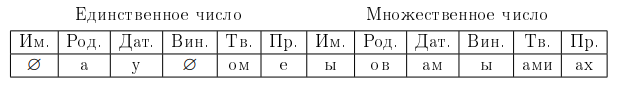

В русском языке, для разных слов используются разные парадигмы. **Словоизменительный класс** — подкласс слов одной части речи с одной морфологической парадигмой. Таким образом, в словаре для каждой лексемы можно хранить только ее часть речи и словоизменительный класс.

Псевдоокончание не всегда будет совпадать с окончанием, так как в некоторых словах при образовании словоформы может происходить изменение корня, изменяться, появляться или выпадать суффиксы, происходить другие изменения. Для глагола *идти* псевдооснова оказывается пустой, так как для форм идти и, например, шёл общих подстрок не находится

Русский язык, конечно, сложный, но для некоторых языков проблема хранения изменений стоит гораздо
острее. 

Например, в арабском языке слово образуется от трёхбуквенной основы добавлением новых букв между имеющихся букв, а также аффиксов в начале и конце слова. С другой стороны, добавление некоторых частей меняет смысл слов, то есть их можно считать новыми словами, которые надо хранить отдельно. 

В немецком языке проблему представляют отделяемые
приставки у глаголов: в некоторых случаях определённые приставки отсоединяются от глагола и переходят в конец предложения. Как и в русском языке, приставка существенно меняет смысл слова. Получается, что для восстановления начальной формы необходимо знать не только  сам токен,
но и ещё один, находящийся в определённом месте предложения.

В тюркских языках новые формы образуются путём конкатенации основы не с флексиями (как мы рассматривали ранее), а с аффиксами, причём сами аффиксы присоединяются в строго определённом порядке. Подобные языки называются агглютинативными. За счёт чётких правил присоединения, к основе может добавляться довольно много аффиксов. Помимо этого, к слову может быть присоединено одно подчинённое слово. В результате количество форм у одного слова может доходить до нескольких тысяч. При том, что их анализ человеком не затрудняется, хранить подобные объёмы становится затруднительно.

Наконец, существуют полисинтетические языки,
в которых несколько членов предложения могут склеиваться в одно слово. 

Таким образом, методы хранения словаря могут зависеть от того, со словарём какого языка мы работаем. 

### Морфологические анализаторы

Первые морфологические анализаторы русского языка были простыми и практически не использовали словарной информации. С ростом вычислительных мощностей и объёмов оперативной памяти, а также появлением новых алгоритмов и структур данных стало возможно эффективное
использование больших словарей, что значительно улучшило качество реализуемой модели. Далее мы проведём обзор различных подходов к морфологическому анализу.

**Бессловарные морфологии** являются одним из первых подходов к решению задачи морфоанализа русского языка. В них отсутствуют большие словари лексических единиц, но фактически используются небольшие словари с информацией
о флексии. Для бессловарной морфологии анализ сводится к поиску наиболее длинного окончания анализируемой словоформы в этом словаре и выборке соответствующих морфологических характеристик. Существенным плюсом здесь является то, что определение морфологических характеристик и нормальной формы возможно практически для любой словоформы, для которой нашлась подходящая флексия. Однако такой подход зачастую оказывается неточным из-за наличия большого количества исключений в языке.

Одним из классических подходов к морфологическому анализу русского языка является построение **словарной морфологии на основе словаря основ.** Основой модели выступает словарь основ, который содержит все (псевдо)основы лексем языка. Он связан со вспомогательными словарями, в которых содержится список флексий всех словоизменительных классов, для каждой из которых указан набор значений морфологических характеристик, которые она может выражать.

Для высокофлективного языка наиболее частым подходом к решению задачи морфологического анализа является **словарная морфология на основе словаря словоформ.** База морфологического процессора, построенного на такой морфологии, заключается в создании словаря всех форм
языка, который может быть представлен в виде таблицы. Определение нормальной формы и морфологических характеристик
сводится к поиску словоформы в таблице. Значительной проблемой всех словарных морфологий, особенно на основе словаря словоформ, является структура хранения словаря, который может занимать несколько гигабайт. К основным недостаткам словарных морфологий, относятся: проблема анализа слов, которых нет в словаре, необходимость
качественного и объёмного словаря, проблема морфологической омонимии.

### Морфологическая омонимия

В примере со словом «косой», мы увидели, что одному и тому же токену может соответствовать несколько разных словоформ. Подобное явление называется лексической неоднозначностью. 

Лексическая неоднозначность включает в себя несколько явлений. **Омонимия** — это явление, при котором два слова сходны по написанию и звучанию, но различные по смыслу. Различают лексическую (совпадение форм разных
лексем), грамматическую (совпадение токенов одной лексемы), синтаксическую (различные корректные трактовки одной и той же последовательности слов) и другие виды омонимии. Лексическая неоднозначность, помимо омонимии, включает в себя
также различные варианты анализа слова в рамках одной лексемы: токен косой может быть проанализирован одновременно как именительный падеж мужского рода и творительный падеж женского рода в рамках одной лексемы ⟨косой, прилагательное⟩.

**Снятие (или разрешение) омонимии** — этап анализа текста, на котором проводится выбор единственного варианта морфологического анализа для каждого токена

Если словарь не содержит данный токен, будем называть этот токен несловарным. Если с данным токеном связано более одной словоформы, будем называть такой токен неоднозначным. 

Как уже было сказано выше, словоформа содержит в себе лемму, часть речи и набор грамматических параметров. Следовательно, неоднозначность может проявить себя в одной из этих частей или их комбинации.

# Заключение

Прежде чем провести морфологический анализ, необходимо выделить из текста отдельные слова. В связи с этим вместе с системой морфологического анализа иногда поставляется подсистема графематического анализа. Входной поток символов разбивается на токены нескольких классов: буквенные последовательности, числа, цифробуквенные комплексы, пунктуация, разделители, иероглифы и т.п. При этом каждый класс токенов имеет собственный набор тегов, в частности, для слов это может быть язык (кириллица или латиница) и регистр.

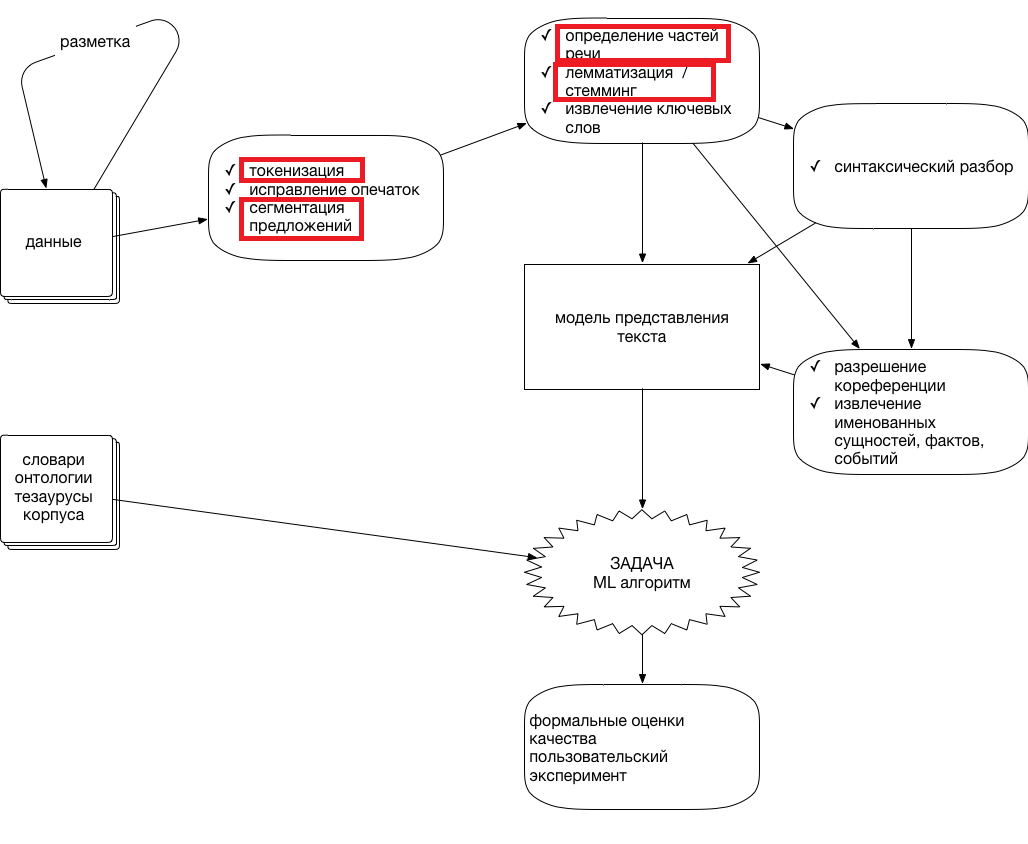